## STEP 1: Loading the data 

### Importing necessary library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("final_corrected_data.csv", skiprows = 0, encoding = "utf-8", na_values=['NA', 'null']) 
data = pd.DataFrame(data)

In [3]:
data.head()

,state,local_gov_area,market_name,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price
0,Abia,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,218.463973,150.982879,304.5
1,Abia,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,243.388285,203.637552,304.5
2,Abia,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,201.472331,156.808585,304.5
3,Abia,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,203.899708,161.420602,304.5
4,Abia,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,184.480688,140.787894,304.5


## STEP 2: Preparing the dataset

### Dealing with the non-numeric data 

In [4]:
data.dtypes

state                      object
local_gov_area             object
market_name                object
price_year                float64
bread_1unit(350g-500g)    float64
cassava_meal_100kg        float64
cowpeas_100kg             float64
gari_100kg                float64
groundnuts_100kg          float64
maize_100kg               float64
millet_100kg              float64
rice_50kg                 float64
sorghum_100kg             float64
fuel_diesel               float64
fuel_petrol_gasoline      float64
USD_NGN _Price            float64
dtype: object

#### There are currently 3 non-numeric values,(lGAs) however we would be predicting food price in Nigeria based on state so,LGA  and market name would be dropped

In [5]:
# List of unique state in the [state] column
unique_states = data["state"].unique()

print(unique_states)

['Abia' 'Borno' 'Yobe' 'Katsina' 'Kano' 'Gombe' 'Kebbi' 'Oyo' 'Zamfara'
 'Lagos' 'Adamawa' 'Kaduna' nan 'Jigawa']


##### There are currently 13 states in the data set, however we would encode all 36 states based on region as it is derived from the data that prices are similar based on region

In [6]:
# using a Dictionary mapping to map each state to a numeric label based on region
state_mapping = {
    'Abia': 1, 'Anambra': 1, 'Ebonyi': 1, 'Enugu': 1, 'Imo': 1,  # South-East
    'Akwa Ibom': 2, 'Bayelsa': 2, 'Cross River': 2, 'Delta': 2, 'Edo': 2, 'Rivers': 2,  # South-South
    'Ekiti': 3, 'Lagos': 3, 'Ogun': 3, 'Ondo': 3, 'Osun': 3, 'Oyo': 3,  # South-West
    'Adamawa': 4, 'Bauchi': 4, 'Borno': 4, 'Gombe': 4, 'Taraba': 4, 'Yobe': 4,  # North-East
    'Benue': 5, 'FCT': 5, 'Kogi': 5, 'Kwara': 5, 'Nasarawa': 5, 'Niger': 5, 'Plateau': 5,  # North-Central
    'Jigawa': 6, 'Kaduna': 6, 'Kano': 6, 'Katsina': 6, 'Kebbi': 6, 'Sokoto': 6, 'Zamfara': 6,  # North-West
}


In [7]:
# Applying the mapping to the "state" column
data["new_state"] = data["state"].map(state_mapping)

# Droping the original "state" column 
data = data.drop("state", axis=1)

data.head()

,local_gov_area,market_name,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price,new_state
0,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,218.463973,150.982879,304.5,1.0
1,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,243.388285,203.637552,304.5,1.0
2,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,201.472331,156.808585,304.5,1.0
3,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,203.899708,161.420602,304.5,1.0
4,Oboma Ngwa,Aba,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,184.480688,140.787894,304.5,1.0


In [8]:
# dropping the remaining non-numeric column
data = data.drop("local_gov_area", axis = 1)
data = data.drop("market_name", axis = 1)

# renaming the state column
data.rename(columns={"new_state": "state"}, inplace=True)

data.head()

,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price,state
0,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,218.463973,150.982879,304.5,1.0
1,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,243.388285,203.637552,304.5,1.0
2,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,201.472331,156.808585,304.5,1.0
3,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,203.899708,161.420602,304.5,1.0
4,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.68168,15457.53979,25671.944224,21283.245741,28351.768962,184.480688,140.787894,304.5,1.0


### Dealing with missing values

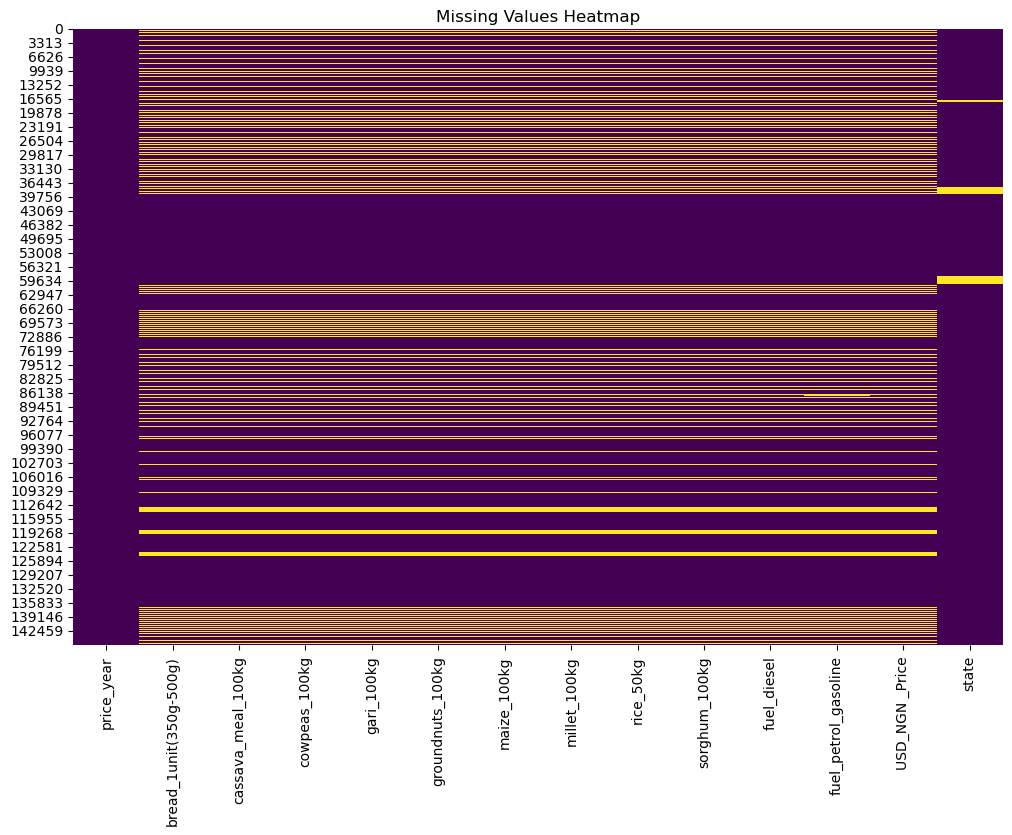

In [9]:
# visualizing missing values, to see the impact in our dataset

import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()

#### The heatmap shows there are a lot of  nulls
#### Trying out different representation


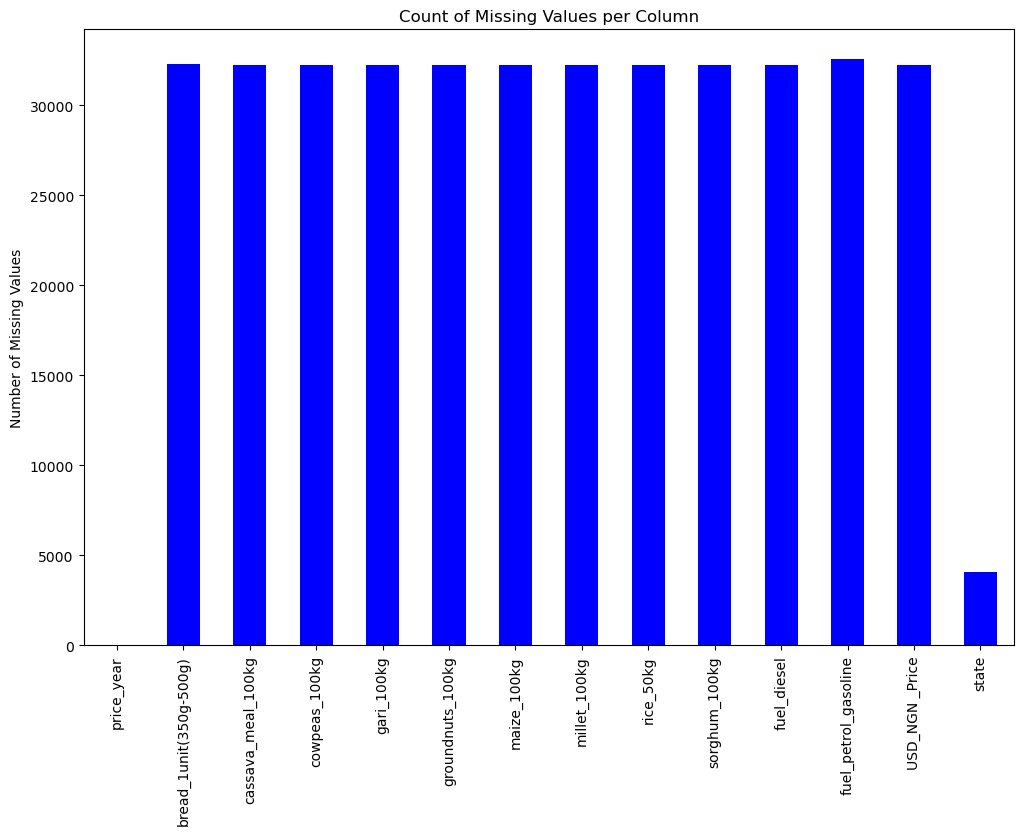

In [10]:
# Count missing values per column
missing_values = data.isnull().sum()

# Ploting missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='bar', color='blue')

plt.title('Count of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

#### There are over 30,000 nulls and all of these can be removed, considering our Large dataset
#### Dropping the nulls

In [11]:
data = data.dropna()
data

,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price,state
0,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.681680,15457.539790,25671.944224,21283.245741,28351.768962,218.463973,150.982879,304.5,1.0
1,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.681680,15457.539790,25671.944224,21283.245741,28351.768962,243.388285,203.637552,304.5,1.0
2,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.681680,15457.539790,25671.944224,21283.245741,28351.768962,201.472331,156.808585,304.5,1.0
3,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.681680,15457.539790,25671.944224,21283.245741,28351.768962,203.899708,161.420602,304.5,1.0
4,2017.0,132.049335,26778.828355,30487.861144,26040.905601,42760.681680,15457.539790,25671.944224,21283.245741,28351.768962,184.480688,140.787894,304.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145732,2024.0,2224.651330,137372.746888,221691.345353,124563.075957,405018.594860,156650.404855,165709.875130,234108.960788,121256.932530,5562.384759,1725.459345,1335.0,4.0
145733,2024.0,2264.645061,139842.369304,225676.807741,126802.412154,412299.828026,159466.591908,168688.929065,238317.661207,123436.832441,5368.459528,2464.362966,1359.0,4.0
145734,2024.0,1874.706177,115763.550748,186818.549455,104968.884233,341307.804658,132008.768136,139643.153199,197282.832125,102182.808312,4999.600140,2218.025248,1125.0,4.0
145735,2024.0,2141.331055,132227.700188,213388.298711,119897.792213,389849.359098,150783.348493,159503.512766,225340.834916,116715.474383,6345.171535,2345.812711,1285.0,4.0


### Checking out the data 

In [12]:
data.describe()

,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price,state
count,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000,109758.000000
mean,2018.736365,286.645769,19872.013635,29565.555063,17257.123140,36771.572943,14772.075130,16771.269117,21610.448018,16370.149731,355.823070,167.958934,311.299815,4.366798
std,2.391053,146.414996,14823.658112,22588.718914,13217.575520,30005.854695,10658.138279,13603.667597,15944.843608,13487.401135,404.065746,111.244356,87.652326,1.225387
min,2014.000000,78.985884,2639.178720,3787.105539,2639.178720,4814.976261,1741.500888,2260.504645,3674.587146,1753.665038,42.479441,27.445548,158.950000,1.000000
25%,2017.000000,172.241684,9742.990987,12647.846770,7921.024419,17680.874071,7805.872013,8138.291195,13255.339238,7568.729111,162.148816,128.484653,304.500000,4.000000
50%,2019.000000,267.064136,16700.357060,23815.032738,14272.527853,26419.346138,10839.933823,13229.207264,16324.850931,12743.832211,224.404152,142.729796,306.000000,4.000000
75%,2021.000000,360.375205,25333.497560,45198.577735,23618.107230,50945.810078,23024.830132,24470.409132,32776.053038,23227.405764,329.338637,204.316203,380.700000,6.000000
max,2024.000000,3648.646896,357207.052779,544524.177619,326352.148818,692445.274089,203461.514089,398714.450754,382255.215525,389008.329294,7683.336116,3124.951128,1585.000000,6.000000


#### the maximum price for some of the food seems too large, so we are checking for any outliers

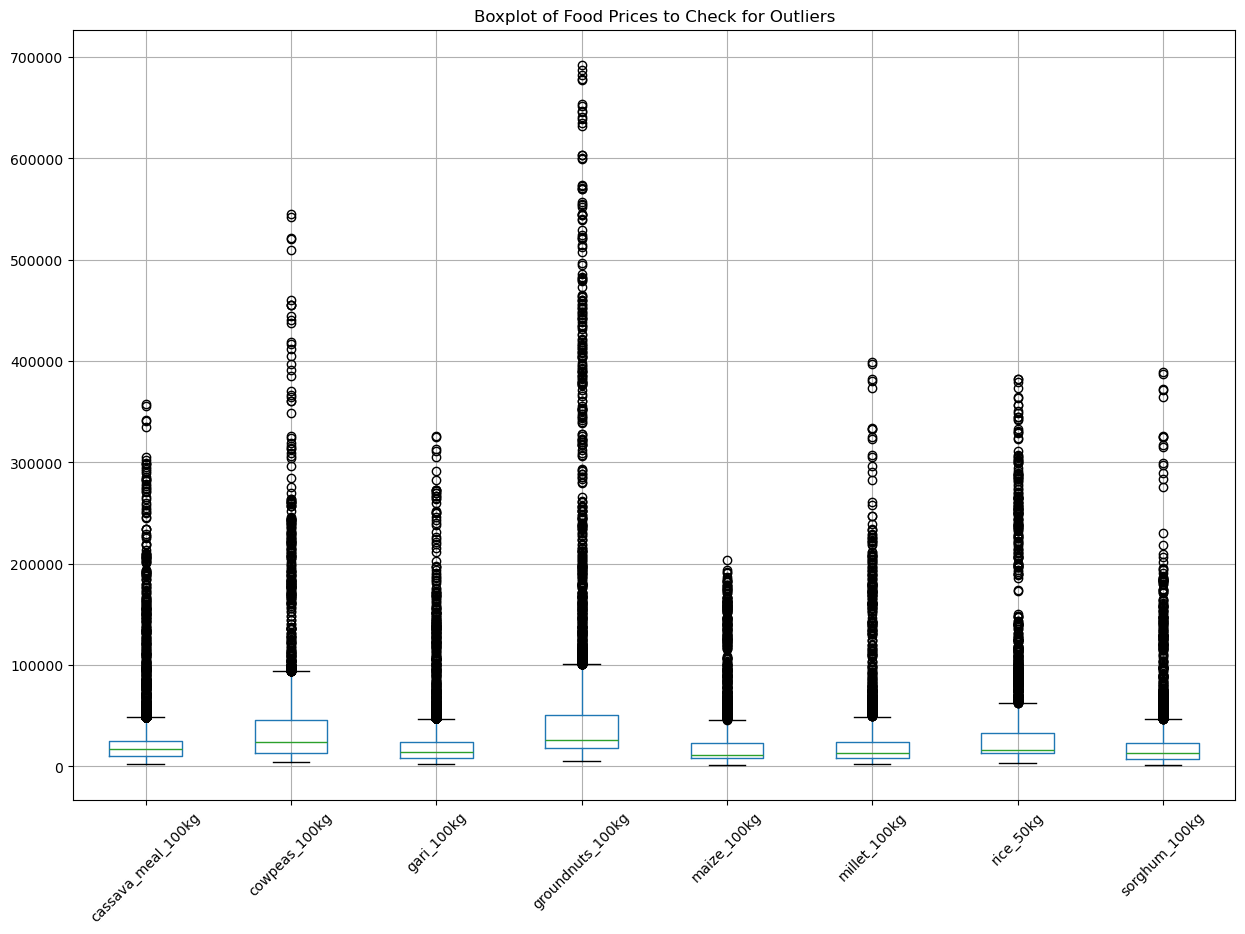

In [13]:
# Creating a box plots for all numeric columns

# List of columns with possible outliers
columns = ['cassava_meal_100kg', 'cowpeas_100kg', 'gari_100kg', 'groundnuts_100kg', 'maize_100kg',
           'millet_100kg', 'rice_50kg', 'sorghum_100kg']

# Creating boxplots
plt.figure(figsize=(15, 10))
data[columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Food Prices to Check for Outliers')
plt.show()

In [14]:
# Function to identify and remove outliers based on a custom Inter-Quartile-Range
def remove_outliers_iqr(data, columns, iqr_range=1.7):
    for column in columns:
        Q1 = data[column].quantile(0.05)
        Q3 = data[column].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_range * IQR
        upper_bound = Q3 + iqr_range * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# applying outlier removal to the columns with potential outliers
columns_with_outliers = ['cassava_meal_100kg', 'cowpeas_100kg', 'gari_100kg', 
                         'groundnuts_100kg', 'maize_100kg', 'millet_100kg', 
                         'rice_50kg', 'sorghum_100kg']

# Applying the function with an adjusted IQR range
data_cleaned = remove_outliers_iqr(data, columns_with_outliers, iqr_range=0.95)

In [15]:
data = data_cleaned

data.describe()

,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price,state
count,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000,108274.000000
mean,2018.686638,282.782667,19104.613676,28462.704207,16549.723740,35310.186687,14294.022473,15967.677897,20855.351863,15563.227095,336.399581,162.500336,307.956009,4.402488
std,2.367837,130.927938,12188.798536,19495.947849,10870.926960,24115.717092,8976.601804,10627.681825,12457.430988,10850.092168,324.510210,72.489846,77.008791,1.182790
min,2014.000000,78.985884,2639.178720,3787.105539,2639.178720,4814.976261,1741.500888,2260.504645,3674.587146,1753.665038,42.479441,27.445548,158.950000,1.000000
25%,2017.000000,170.951126,9651.884216,12569.705782,7864.831187,17537.383777,7801.869591,8054.989914,13213.070983,7488.226592,160.206914,126.455127,304.500000,4.000000
50%,2019.000000,267.064136,16235.940977,23510.460000,14068.261020,26218.594415,10733.074018,13056.787732,16289.739653,12665.888283,224.162132,142.174967,306.000000,4.000000
75%,2021.000000,360.360469,25019.095271,43701.404050,22834.860208,48087.204125,22670.103351,23811.195568,31398.511946,22797.565780,318.449703,203.175111,380.700000,6.000000
max,2023.000000,786.709454,85879.897776,94969.204378,70941.601531,165437.905693,56487.667101,63893.358272,80235.691104,63834.187275,2876.069437,816.185549,771.000000,6.000000


#### 2024 has been filtered out which means our data is now from 2014 to 2023

### Dealing with the data types

In [16]:
data.loc[:, 'price_year'] = data['price_year'].astype(int)
data.loc[:, 'state'] = data['state'].astype(int)

data.dtypes

price_year                float64
bread_1unit(350g-500g)    float64
cassava_meal_100kg        float64
cowpeas_100kg             float64
gari_100kg                float64
groundnuts_100kg          float64
maize_100kg               float64
millet_100kg              float64
rice_50kg                 float64
sorghum_100kg             float64
fuel_diesel               float64
fuel_petrol_gasoline      float64
USD_NGN _Price            float64
state                     float64
dtype: object

In [17]:
# rounding up the remaining columns to 2 d.p
columns_to_round = [
    'bread_1unit(350g-500g)',
    'cassava_meal_100kg',
    'cowpeas_100kg',
    'gari_100kg',
    'groundnuts_100kg',
    'maize_100kg',
    'millet_100kg',
    'rice_50kg',
    'sorghum_100kg',
    'fuel_diesel',
    'fuel_petrol_gasoline',
    'USD_NGN _Price'
]

data[columns_to_round] = data[columns_to_round].round(2)

data.head()

,price_year,bread_1unit(350g-500g),cassava_meal_100kg,cowpeas_100kg,gari_100kg,groundnuts_100kg,maize_100kg,millet_100kg,rice_50kg,sorghum_100kg,fuel_diesel,fuel_petrol_gasoline,USD_NGN _Price,state
0,2017.0,132.05,26778.83,30487.86,26040.91,42760.68,15457.54,25671.94,21283.25,28351.77,218.46,150.98,304.5,1.0
1,2017.0,132.05,26778.83,30487.86,26040.91,42760.68,15457.54,25671.94,21283.25,28351.77,243.39,203.64,304.5,1.0
2,2017.0,132.05,26778.83,30487.86,26040.91,42760.68,15457.54,25671.94,21283.25,28351.77,201.47,156.81,304.5,1.0
3,2017.0,132.05,26778.83,30487.86,26040.91,42760.68,15457.54,25671.94,21283.25,28351.77,203.90,161.42,304.5,1.0
4,2017.0,132.05,26778.83,30487.86,26040.91,42760.68,15457.54,25671.94,21283.25,28351.77,184.48,140.79,304.5,1.0


### Checking out the relationships of the datas with representation

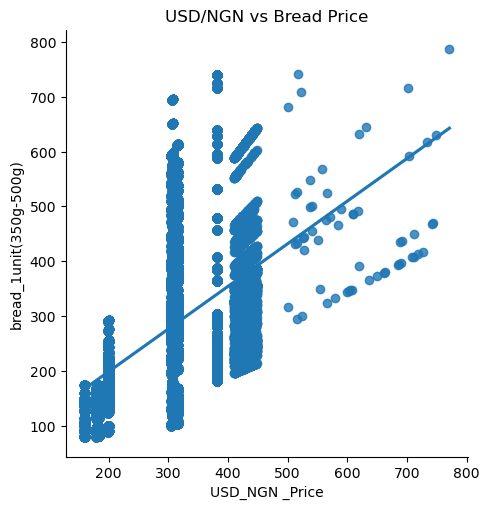

In [18]:
sns.lmplot(x='USD_NGN _Price', y='bread_1unit(350g-500g)', data=data)
plt.title('USD/NGN vs Bread Price')
plt.show()

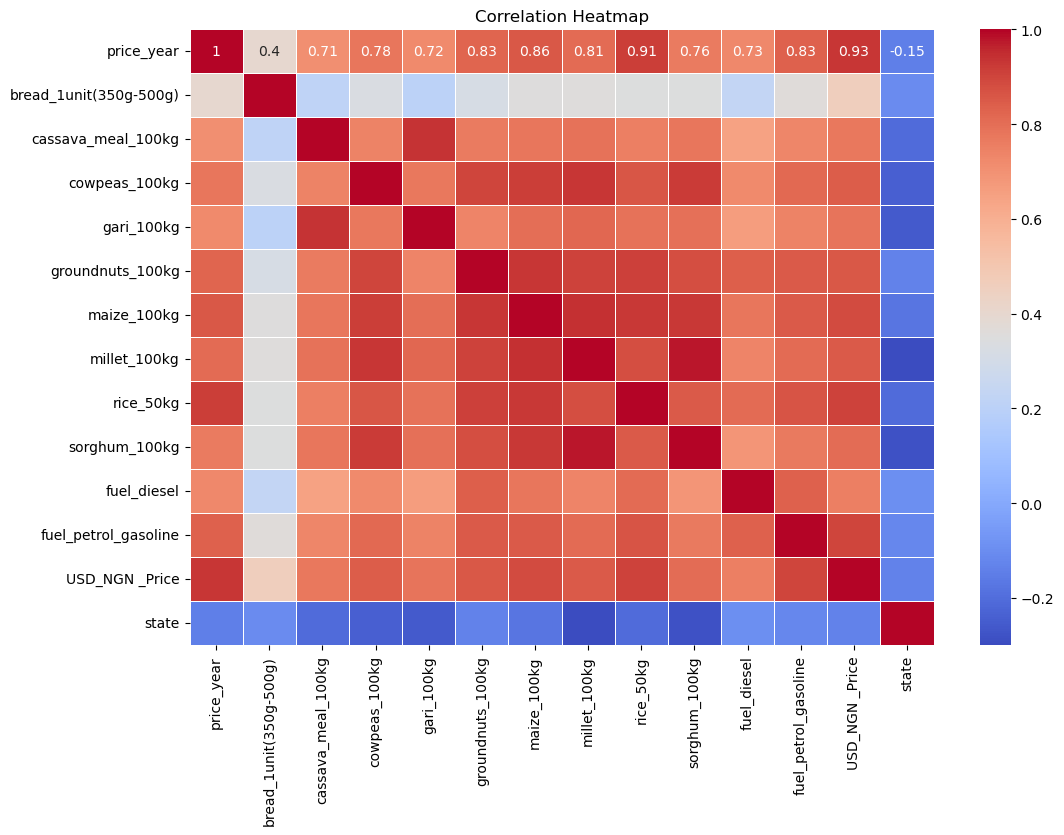

In [19]:
# Computing correlation matrix
columns_to_plot = [
    'price_year',
    'bread_1unit(350g-500g)',
    'cassava_meal_100kg',
    'cowpeas_100kg',
    'gari_100kg',
    'groundnuts_100kg',
    'maize_100kg',
    'millet_100kg',
    'rice_50kg',
    'sorghum_100kg',
    'fuel_diesel',
    'fuel_petrol_gasoline',
    'USD_NGN _Price',
    'state'
]


corr_matrix = data[columns_to_plot].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### From the heatmap, we see there is somewhat possive correlation between the food prices and the feature variables

### _____________________________________________________________________________________________

## STEP 3: Splitting the dataset into training and testing set

#### Separating the dataset into feature and target variable

In [20]:
# feature variable
X = data[["fuel_diesel", "USD_NGN _Price", "price_year", "fuel_petrol_gasoline", "state"]]

# Target variables
y = data.drop(["fuel_diesel", "USD_NGN _Price", "price_year", "fuel_petrol_gasoline", "state"], axis=1)  # droped the this because the rest are food prices

X

,fuel_diesel,USD_NGN _Price,price_year,fuel_petrol_gasoline,state
0,218.46,304.5,2017.0,150.98,1.0
1,243.39,304.5,2017.0,203.64,1.0
2,201.47,304.5,2017.0,156.81,1.0
3,203.90,304.5,2017.0,161.42,1.0
4,184.48,304.5,2017.0,140.79,1.0
...,...,...,...,...,...
145444,2876.07,566.0,2023.0,668.77,4.0
145445,2465.63,541.0,2023.0,576.47,4.0
145499,2433.73,522.0,2023.0,677.33,6.0
145509,2362.06,501.0,2023.0,697.44,6.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123) #80% used for training

## STEP 4: Scaling the feature variable to ensure all of them contribute to the model


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## STEP 5: Training the model

In [23]:
food_predict_model = LinearRegression(positive = True)

# using fit on the training data set to train the model
food_predict_model.fit(X_train, y_train)

LinearRegression(positive=True)

In [24]:
# trying to make prediction
y_pred = food_predict_model.predict(X_test)

In [25]:
y_pred

array([[  280.58977428, 17747.70284629, 25915.50609025, ...,
        13804.45275364, 14838.75499422, 13669.62582764],
       [  280.58977428, 18064.72671476, 26736.35071472, ...,
        14122.46514914, 15212.57677756, 13997.46976476],
       [  288.84580341, 19246.58667285, 28609.14314842, ...,
        15167.94928169, 15986.74223077, 14988.44931502],
       ...,
       [  165.9270796 ,  2154.38677744, -1033.70008667, ...,
         -104.11067411,   104.98120374,  -138.05133132],
       [  365.66311264, 32725.60555714, 52255.47175527, ...,
        29785.4284588 , 39245.01786415, 28596.1167811 ],
       [  340.61929908, 26509.05822499, 41291.0580098 , ...,
        22921.1014098 , 29801.49791214, 22412.06501235]])

## STEP 6 Testing and evaluating

#### Using MSE for the evaluation, mean square error has been imported above 

In [26]:
# Calculating the MSE between the actual values of thd test data (y_test) and the predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 45266372.37936702


In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mae

4366.151232125776

#### Experimenting Regularization

In [29]:
# training a ridge_regression model
ridge = Ridge(positive = True)
ridge.fit(X_train, y_train)

Ridge(positive=True)

In [30]:
ridge_pred = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge MAE:", mean_absolute_error(y_test, ridge_pred))

Ridge MSE: 45266589.93582019
Ridge MAE: 4365.888753118635


In [31]:
# training a lasso_regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [32]:
lasso_pred = lasso.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso MAE", mean_absolute_error(y_test, lasso_pred))

Lasso MSE: 42948458.38297765
Lasso MAE 4365.98976439552


#### Trying out another algorithm

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Initializing the Random Forest Regressor
#random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest = RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42) # tried adjusting
# Training the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

In [35]:
# Predictions on the test set
randomf_y_pred = random_forest.predict(X_test)

In [36]:
print("random_forest MSE:", mean_squared_error(y_test, randomf_y_pred))
print("random_forest MAE:", mean_absolute_error(y_test, randomf_y_pred)) # after removing the year

random_forest MSE: 17945846.637579944
random_forest MAE: 2617.9983063844356


#### The error are somewhat large, however we found out that it is due to our large figures in the data set
#### So The mean average error(MAE) is how the predicted value is far from the actual value and that quite reasonable for prises recorded in thousand

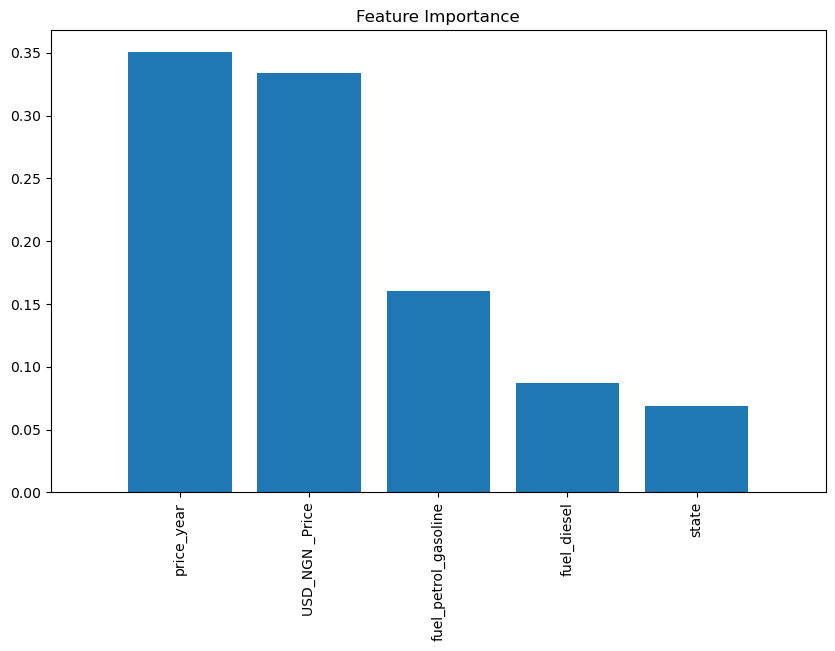

In [37]:
import matplotlib.pyplot as plt

# Geting feature importances from the Random Forest model
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### This shows how each features contributed to the model

In [38]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='neg_mean_absolute_error')

# Converting the negative scores to positive
cv_rmae = np.sqrt(-cv_scores)

print("Cross-Validated RMAE:", cv_rmae)
print("Mean Cross-Validated RMAE:", cv_rmae.mean())


Cross-Validated RMAE: [71.770058   79.59268621 43.53128327 53.48739033 60.3243341 ]
Mean Cross-Validated RMAE: 61.741150380474906


## STEP 7: Saving the Model

In [39]:
import joblib

joblib.dump(ridge, 'food_price_prediction_Ridgemodel') # of the linear regression model, we are saving the Ridge model

['food_price_prediction_Ridgemodel']

In [40]:
joblib.dump(random_forest, 'food_price_prediction_Rfmodel')

['food_price_prediction_Rfmodel']

## STEP 8: Testing new data

In [41]:
loaded_model = joblib.load('food_price_prediction_Ridgemodel')
new_data = pd.DataFrame({
    'fuel_diesel': [500],
    'USD_NGN _Price': [800],
    'price_year': [2034],
    'fuel_petrol_gasoline': [150],
    'state': [state_mapping['Lagos']]
})

# Applying the same preprocessing
new_data = scaler.transform(new_data) #scaling

### Assuming diesel is now N500, dollar is N800, petrol is 150, in the year 2034, in Lagos

In [42]:
prediction = loaded_model.predict(new_data)
prediction = np.maximum(0, prediction)
print(prediction)

[[   670.76069297  66207.57359879 104635.52471069  59355.86095333
  112768.43084822  53227.19323347  60091.34570336  78153.17155999
   58372.27466626]]


In [43]:
Rfloaded_model = joblib.load('food_price_prediction_Rfmodel')
new_data = pd.DataFrame({
    'fuel_diesel': [500],
    'USD_NGN _Price': [800],
    'price_year': [2034],
    'fuel_petrol_gasoline': [150],
    'state': [state_mapping['Lagos']]
})

# Applying the same preprocessing
new_data = scaler.transform(new_data) #scaling

In [44]:
prediction = Rfloaded_model.predict(new_data)
print(prediction) # bread price prediction 

[[  512.14818643 25426.28427544 65194.02478267 22699.3838407
  84072.56015256 31936.55206675 35271.48936685 45062.82338762
  34339.17298724]]


### Assuming diesel is now N300, dollar is N200, petrol is 100, in the year 2044, in Lagos 

In [45]:
new_data2 = pd.DataFrame({
    'fuel_diesel': [300],
    'USD_NGN _Price': [200],
    'price_year': [2044],
    'fuel_petrol_gasoline': [100],
    'state': [state_mapping['Lagos']]
})

In [46]:
new_data2 = scaler.transform(new_data2) #scaling

In [47]:
prediction = loaded_model.predict(new_data2)
print(prediction)

[[  198.30472706  7784.16414089  9150.21414972  6375.75974849
  64946.00136199 26605.59668552 18829.55531071 81701.6775278
  15505.94743744]]


In [48]:
prediction = Rfloaded_model.predict(new_data2)
print(prediction)

[[  415.0668319  16362.83767718 41521.57118462 14496.74381647
  45013.62284219 18640.31887533 21847.89474324 26481.42030043
  21819.33554456]]


### Testing to see the feature's Effect on the Model

In [49]:
new_data3 = pd.DataFrame({
    'fuel_diesel': [30],
    'USD_NGN _Price': [20],
    'price_year': [2124],
    'fuel_petrol_gasoline': [10],
    'state': [state_mapping['Lagos']]
})

new_data3 = scaler.transform(new_data3) #scaling

In [50]:
prediction = Rfloaded_model.predict(new_data3)
print(prediction)

[[  371.98942    15489.83646645 35633.81314807 13084.29479842
  40504.33133279 16465.555834   19309.53476032 23422.16605925
  18900.62893756]]


In [51]:
prediction = loaded_model.predict(new_data3)
print(prediction) 

[[ 5.65679373e+01 -1.17745813e+04 -2.43019108e+04 -1.13234466e+04
   1.72438069e+05  7.43205589e+04  4.00191281e+04  2.79207557e+05
   2.80797187e+04]]


#### Note that e+01 = 1*10^1

In [52]:
new_data4 = pd.DataFrame({
    'fuel_diesel': [1400],
    'USD_NGN _Price': [1585],
    'price_year': [2024],
    'fuel_petrol_gasoline': [650],
    'state': [state_mapping['FCT']]  # testing with today's situation
})

new_data4 = scaler.transform(new_data4) #scaling

In [53]:
prediction = loaded_model.predict(new_data4)
print(prediction)

[[  1288.89058169 151656.76042676 252516.20656899 136519.93439655
  213181.75119103  98543.45702156 124682.47181014  92370.13963829
  124962.14551885]]


In [54]:
prediction = Rfloaded_model.predict(new_data4)
print(prediction)

[[   411.55301206  55658.25226379  68233.89786906  46886.50764774
  111152.93759546  36954.07195386  40628.1443654   64212.60308667
   37218.98582488]]


In [55]:
new_data5 = pd.DataFrame({
    'fuel_diesel': [1400],
    'USD_NGN _Price': [1585],
    'price_year': [2024],
    'fuel_petrol_gasoline': [650],
    'state': [state_mapping['Lagos']]
})

new_data5 = scaler.transform(new_data5) #scaling

In [56]:
prediction = loaded_model.predict(new_data5)
print(prediction)

[[  1288.89058169 151656.76042676 252516.20656899 136519.93439655
  213181.75119103  98543.45702156 124682.47181014  92370.13963829
  124962.14551885]]


In [57]:
prediction = Rfloaded_model.predict(new_data5)
print(prediction)

[[   539.26519192  41188.13302894  78236.00037527  36366.4236464
  108975.56391785  38035.08980413  42290.62373112  62807.44980879
   40724.23293437]]


In [58]:
new_data = pd.DataFrame({
    'fuel_diesel': [1400],
    'USD_NGN _Price': [1585],
    'price_year': [2024],
    'fuel_petrol_gasoline': [200],  #if petrol price should drop to N200 in 2024
    'state': [state_mapping['Borno']]
})

new_data = scaler.transform(new_data) #scaling

In [59]:
prediction = loaded_model.predict(new_data)
print(prediction)

[[  1288.89058169 145479.60015017 234343.15925763 131376.95832312
  199814.69001816  94109.07901306 119330.82328358  87185.53028147
  118633.81654659]]


In [60]:
prediction = Rfloaded_model.predict(new_data)
print(prediction)

[[  390.12196377 46892.99766538 61480.7616235  39934.19734472
  95642.68044047 33639.30322844 37003.15588183 54786.33987859
  34231.18267646]]


In [61]:
new_data = pd.DataFrame({
    'fuel_diesel': [1400],
    'USD_NGN _Price': [300],
    'price_year': [2024],
    'fuel_petrol_gasoline': [200],  #if petrol price should drop to N200 and dollar drop to 300 in 2024
    'state': [state_mapping['Borno']]
})

new_data = scaler.transform(new_data) #scaling

In [62]:
prediction = loaded_model.predict(new_data)
print(prediction)

[[  277.04738805 23870.22844711 37795.88910669 21068.72560011
  77489.73209623 24707.2205597  24972.17626947 44545.09411515
  22874.00724396]]


In [63]:
prediction = Rfloaded_model.predict(new_data)
print(prediction)

[[  299.23541672 26841.21839983 39754.72205271 24226.1927735
  49821.65144485 20628.38083811 22241.85546911 32210.30653212
  21475.31947286]]


In [64]:
new_data = pd.DataFrame({
    'fuel_diesel': [400],
    'USD_NGN _Price': [1585],
    'price_year': [2024],
    'fuel_petrol_gasoline': [200],  #if petrol price should drop to N200 and diesel N400 in 2024
    'state': [state_mapping['Borno']]
})

new_data = scaler.transform(new_data) #scaling

In [65]:
prediction = loaded_model.predict(new_data)
print(prediction)

[[  1288.89058169 140707.23861593 225877.96599022 126862.60922006
  168939.19926994  88011.10475094 113055.13863833  77982.71712419
  113478.41231513]]


In [66]:
prediction = Rfloaded_model.predict(new_data)
print(prediction)

[[  373.74400757 45595.20035924 61906.14694264 40196.29618638
  89417.7156653  32117.24527139 35468.29181095 50649.43820863
  33378.69005768]]


#### This shows that for both model, dollar price has influence on the food prices, however, it has more effect on the ridge_model 

In [67]:
new_data = pd.DataFrame({
    'fuel_diesel': [400],
    'USD_NGN _Price': [1585],
    'price_year': [2024],
    'fuel_petrol_gasoline': [200],  
    'state': [state_mapping['Abia']]  # checking to see the state's effect
}) 

new_data = scaler.transform(new_data) #scaling

In [68]:
prediction = loaded_model.predict(new_data)
print(prediction)

[[  1288.89058169 140707.23861593 225877.96599022 126862.60922006
  168939.19926994  88011.10475094 113055.13863833  77982.71712419
  113478.41231513]]


In [69]:
prediction = Rfloaded_model.predict(new_data)
print(prediction)

[[  356.9082     51321.79732977 83953.57721376 46512.05323858
  92420.88603318 33292.32623469 54421.13765929 44871.46788428
  55693.69868042]]


In [70]:
new_data = pd.DataFrame({
    'fuel_diesel': [400],
    'USD_NGN _Price': [1585],
    'price_year': [2024],
    'fuel_petrol_gasoline': [200],  
    'state': [state_mapping['Lagos']]  # checking to see the state's effect
}) 

new_data = scaler.transform(new_data) #scaling

In [71]:
prediction = loaded_model.predict(new_data)
print(prediction)

[[  1288.89058169 140707.23861593 225877.96599022 126862.60922006
  168939.19926994  88011.10475094 113055.13863833  77982.71712419
  113478.41231513]]


In [72]:
prediction = Rfloaded_model.predict(new_data)
print(prediction)

[[  498.65941174 28630.47389718 76200.04718764 26563.92954526
  97623.019597   36024.7800617  40217.1568479  48870.11722694
  39477.23991975]]


#### We see that the state also has effect on the model(Random_forest)
# ________________________________________________________________

## visualizing both Model feature importance 

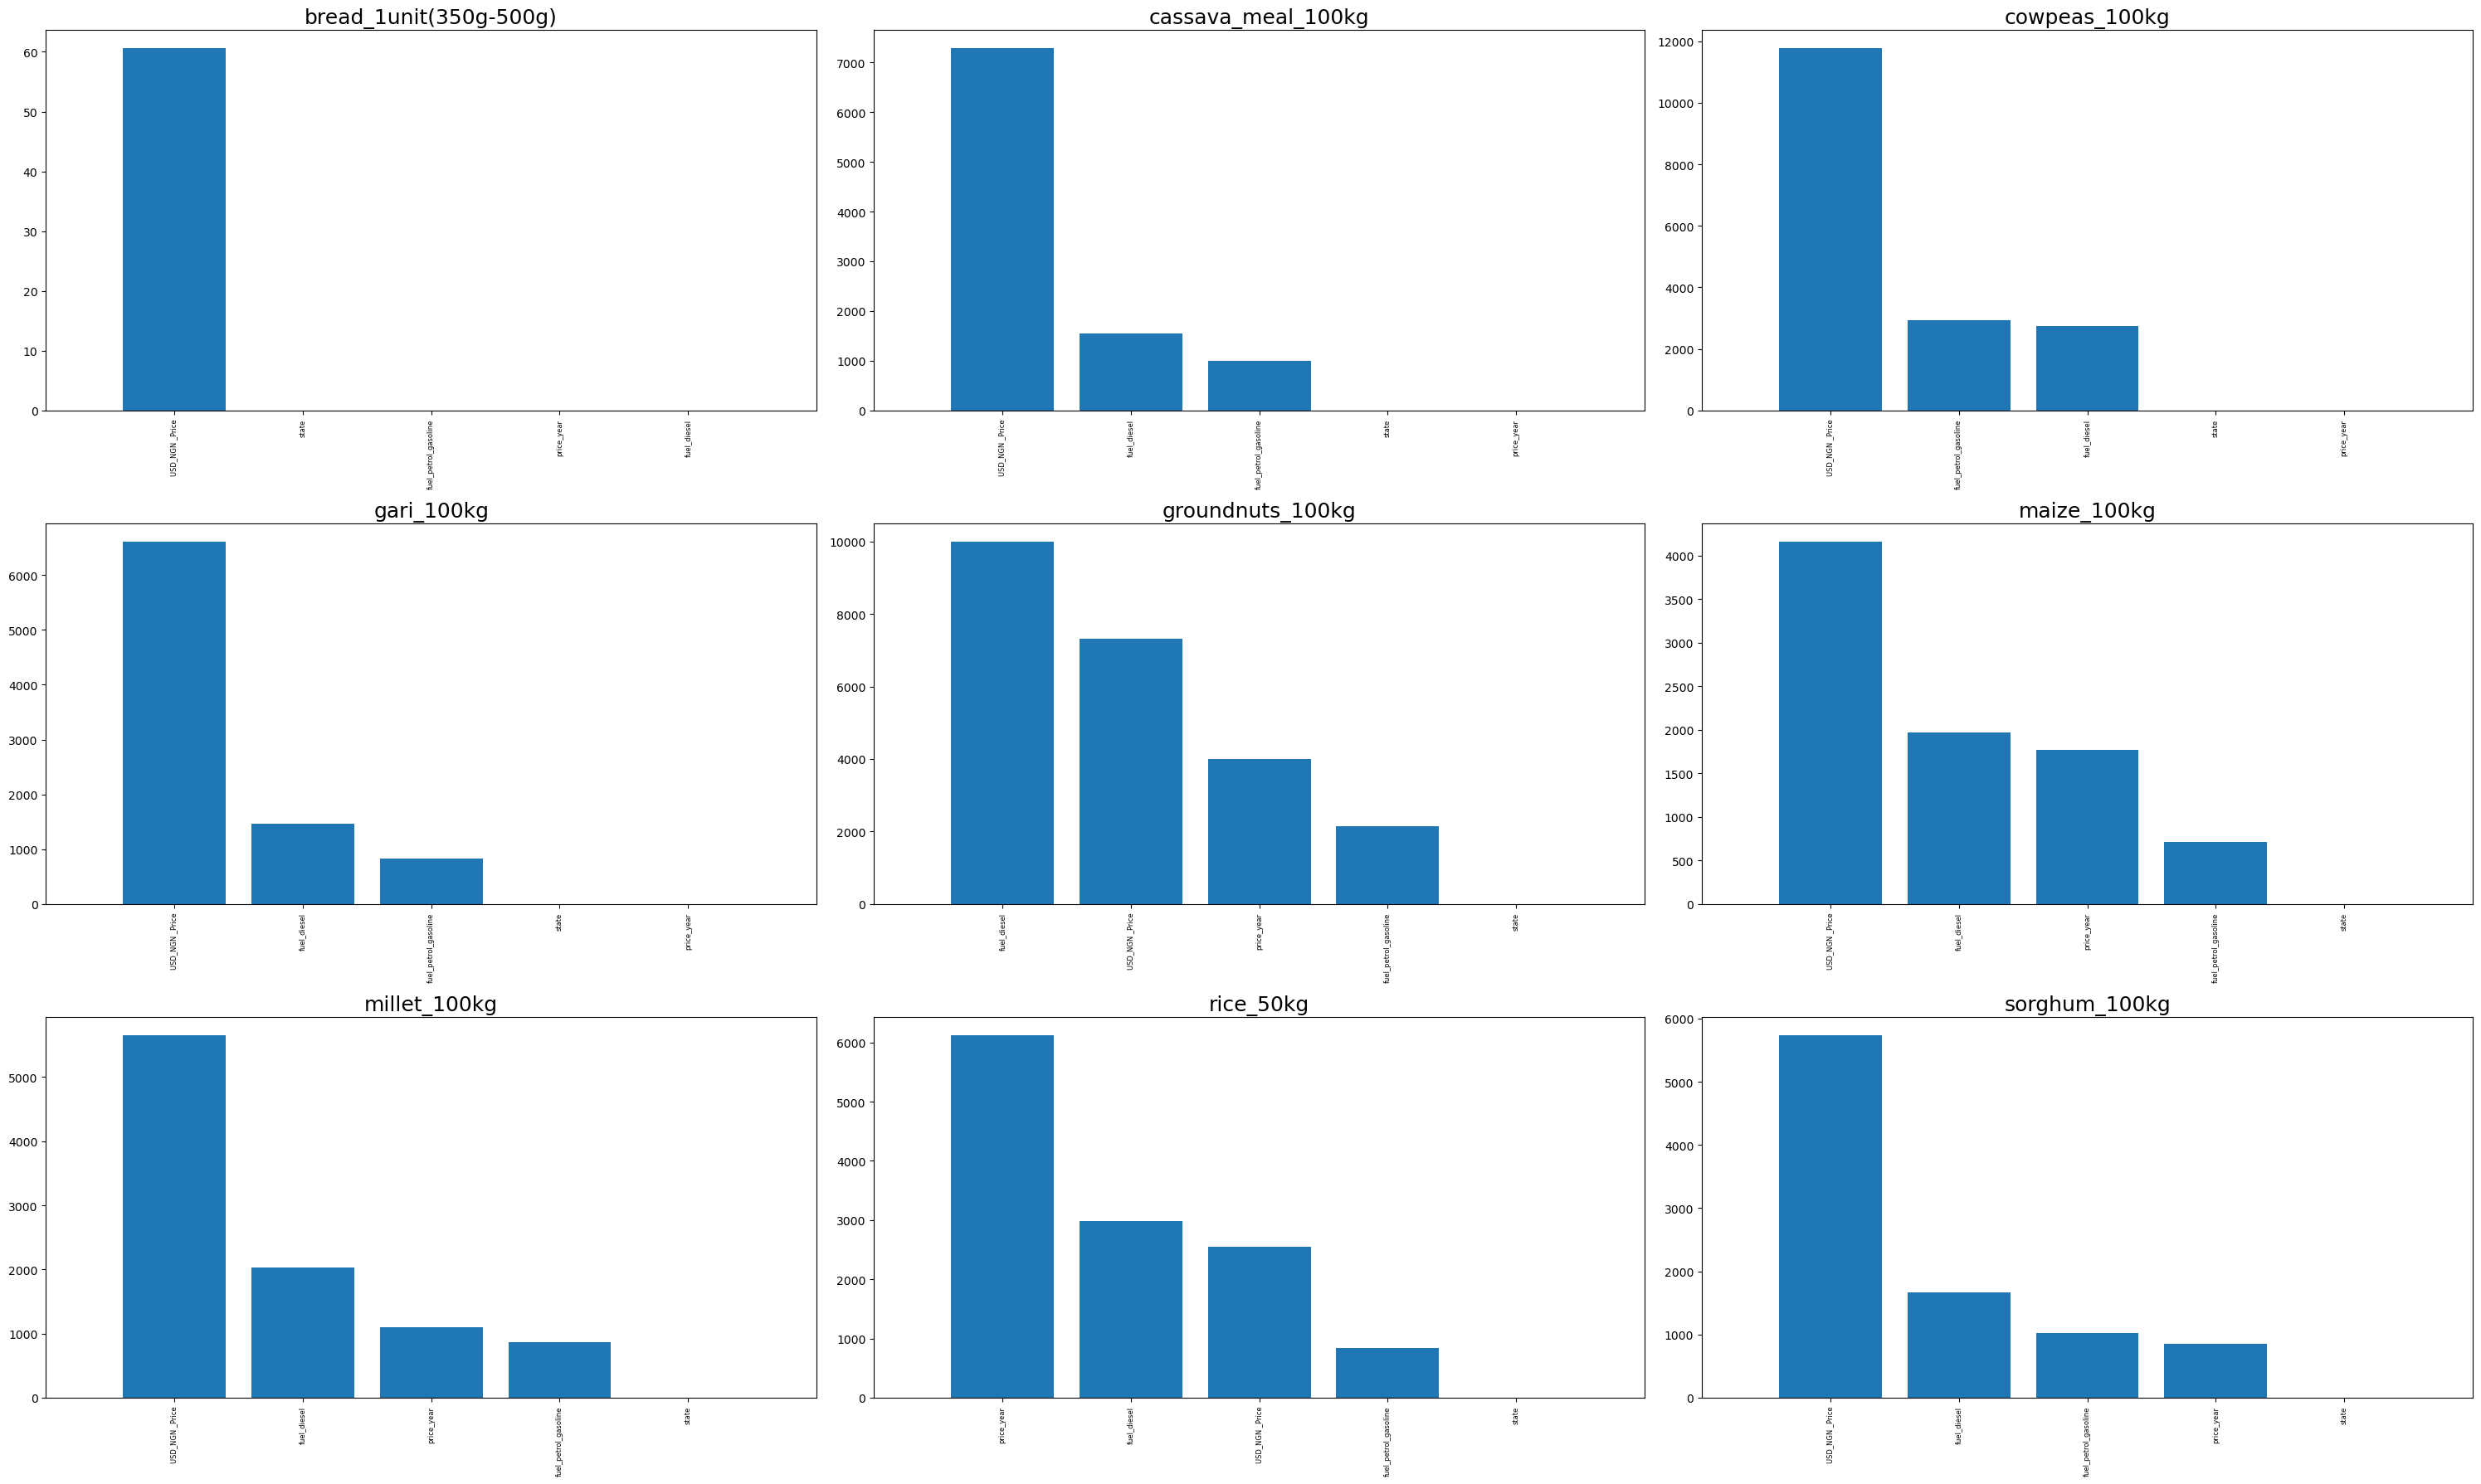

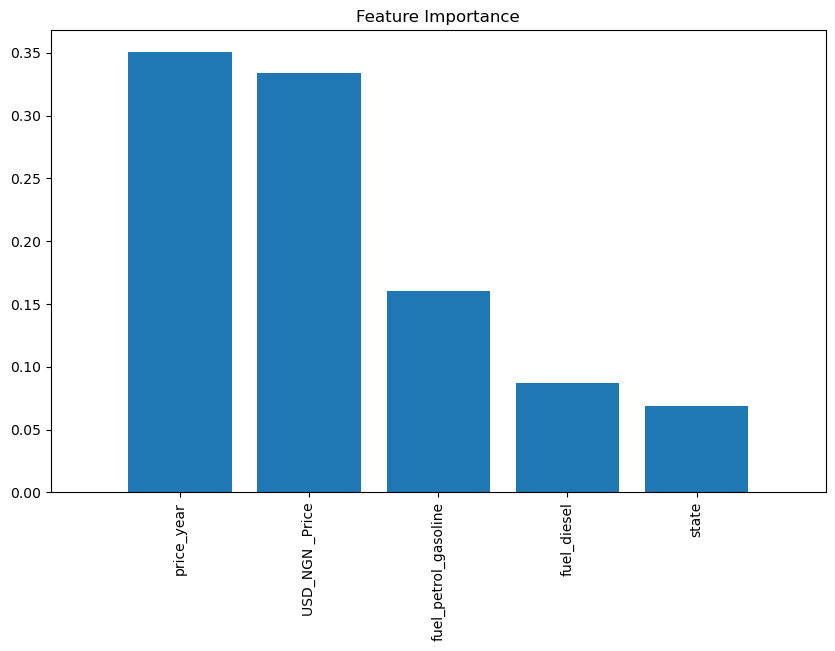

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your linear model is named 'linear_model'
coefficients = ridge.coef_

# List of target names
target_names = [
    'bread_1unit(350g-500g)',
    'cassava_meal_100kg',
    'cowpeas_100kg',
    'gari_100kg',
    'groundnuts_100kg',
    'maize_100kg',
    'millet_100kg',
    'rice_50kg',
    'sorghum_100kg'
]

# Number of targets
num_targets = len(target_names)

# Creating subplots with 3 columns and enough rows to fit all targets
fig, axes = plt.subplots(nrows=(num_targets // 3) + (num_targets % 3 > 0), ncols=3, figsize=(30, 18))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Looping over each target variable and its corresponding name
for i, target_name in enumerate(target_names):

    indices = np.argsort(np.abs(coefficients[i]))[::-1]

    # Ploting the feature importances (coefficients) for the target
    axes[i].bar(range(coefficients.shape[1]), coefficients[i, indices], align="center")
    axes[i].set_title(target_name, fontsize=18)
    axes[i].set_xticks(range(coefficients.shape[1]))
    axes[i].set_xticklabels(X.columns[indices], rotation=90, fontsize=6)
    axes[i].set_xlim([-1, coefficients.shape[1]])

# Hide any empty subplots (if num_targets is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

# for the Random forest
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### This shows the features are contributing differently for the ridge model with no contribution for state

## Exporting the Ridge_Linear Regression Model as pkl file

In [76]:
import os

original_file = 'food_price_prediction_Ridgemodel'
new_file = 'Group2 food price prediction.pkl'

# Renaming the random forest model file
os.rename(original_file, new_file)

### Saving the feature scaling for future use

In [77]:
joblib.dump(scaler, 'scaler') 

['scaler']